# **Aula 03 - Atividade 03 - Discretização e seleção de atributos**

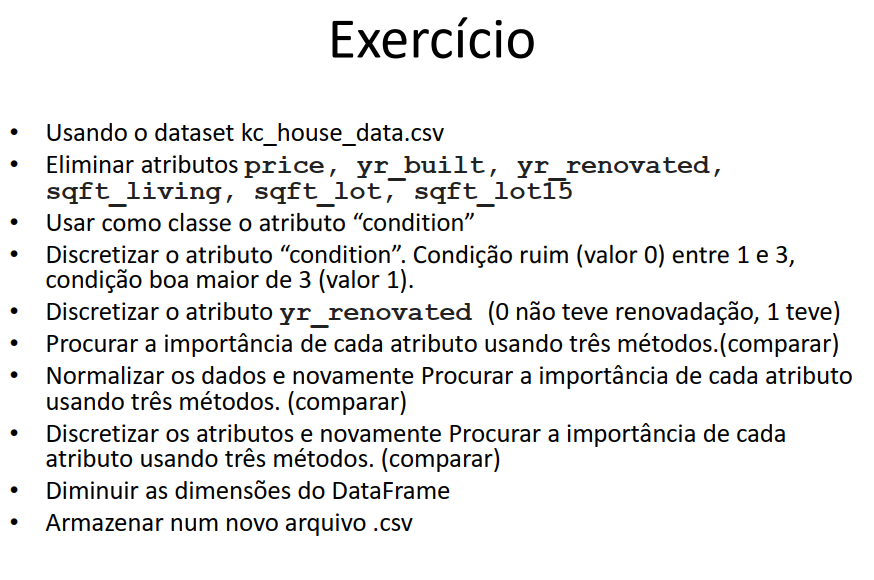

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import GenericUnivariateSelect, chi2, mutual_info_classif, f_classif

### Montagem de drive para manipulação de arquivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### 1. Usando o dataset kc_house_data.csv

In [ ]:
df_houses = pd.read_csv('/content/drive/Shareddrives/pgds_dataset/kc_house_data.csv')
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 2. Eliminar outros atributos que não sejam **price**, **yr_built**, **yr_renovated**, **sqft_living**, **sqft_lot**, **sqft_lot15**

In [ ]:
new_df_houses = df_houses[['price', 'yr_built', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_lot15']]
new_df_houses

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15
0,221900.0,1955,0,1180,5650,5650
1,538000.0,1951,1991,2570,7242,7639
2,180000.0,1933,0,770,10000,8062
3,604000.0,1965,0,1960,5000,5000
4,510000.0,1987,0,1680,8080,7503
...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,1509
21609,400000.0,2014,0,2310,5813,7200
21610,402101.0,2009,0,1020,1350,2007
21611,400000.0,2004,0,1600,2388,1287


### 3. Usar como classe o atributo **Condition**

In [ ]:
condition = df_houses['condition']
condition

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64

### 4. Discretizar o atributo **condition**. Condição ruim (valor 0) entre 1 e 3, condição boa maior de 3 (valor 1)

In [ ]:
condition = pd.DataFrame([1 if x > 3 else 0 for x in condition])
condition

,0
0,0
1,0
2,0
3,1
4,0
...,...
21608,0
21609,0
21610,0
21611,0


### 5. Discretizar o atributo **yr_renovated** (0 não teve renovação, 1 teve)

In [ ]:
new_df_houses['yr_renovated'] = [1 if x > 0 else 0 for x in new_df_houses['yr_renovated']]
new_df_houses

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15
0,221900.0,1955,0,1180,5650,5650
1,538000.0,1951,1,2570,7242,7639
2,180000.0,1933,0,770,10000,8062
3,604000.0,1965,0,1960,5000,5000
4,510000.0,1987,0,1680,8080,7503
...,...,...,...,...,...,...
21608,360000.0,2009,0,1530,1131,1509
21609,400000.0,2014,0,2310,5813,7200
21610,402101.0,2009,0,1020,1350,2007
21611,400000.0,2004,0,1600,2388,1287


### 6. Procurar a importância de cada atributo usando três métodos

X = atributos
Y = classe do registro

In [ ]:
def get_xY(df):
  array_n = df.values
  X = array_n[:,0:6]
  Y = condition[0].values
  return X, Y

In [ ]:
def find_att_importance(method, df):  
  X, Y = get_xY(df)
  gus = GenericUnivariateSelect(method, 'k_best', param='all')
  features = gus.fit_transform(X, Y)
  feature_importance = gus.scores_
  # print(sorted(zip(map(lambda f: round(f, 4), feature_importance), new_df_houses.columns),reverse=True))
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  return feature_importance

In [ ]:
def plot_att_importance(methods, df):  
  fig, ax = plt.subplots(1, len(methods), figsize=(20,5))
  for i, m in enumerate(methods):
    feature_importance = find_att_importance(m, df)   
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 1
    names = np.array(df.columns)    
    ax[i].set_ylabel('Importância Relativa')
    ax[i].bar(pos, feature_importance[sorted_idx], width=0.4, align='center')    
    ax[i].set_xticks(pos)
    ax[i].set_xticklabels(names[sorted_idx], rotation=45)
    ax[i].set_title(m.__name__)
  plt.show()

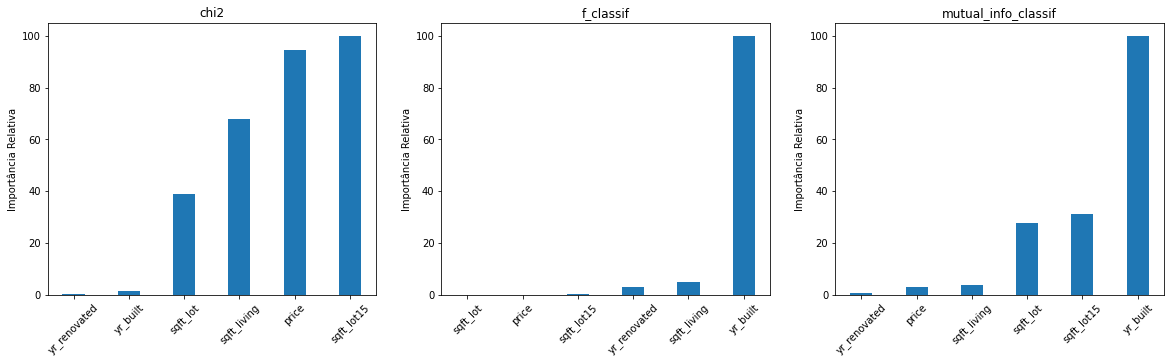

In [ ]:
methods = [chi2, f_classif, mutual_info_classif]
plot_att_importance(methods, new_df_houses)

### 7. Normalizar os dados e novamente procurar a importancia de cada atributo usando três métodos

In [ ]:
def data_normalization(data):
  max_value = data.max()
  min_value = data.min()
  data = [((x - min_value) / (max_value - min_value)) for x in data]
  return data

In [ ]:
df_norm = new_df_houses.copy()
for feature in ['price', 'yr_built', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
  df_norm[f"{feature}"] = data_normalization(df_norm[f"{feature}"])

df_norm

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15
0,0.019266,0.478261,0,0.067170,0.003108,0.005742
1,0.060721,0.443478,1,0.172075,0.004072,0.008027
2,0.013770,0.286957,0,0.036226,0.005743,0.008513
3,0.069377,0.565217,0,0.126038,0.002714,0.004996
4,0.057049,0.756522,0,0.104906,0.004579,0.007871
...,...,...,...,...,...,...
21608,0.037377,0.947826,0,0.093585,0.000370,0.000986
21609,0.042623,0.991304,0,0.152453,0.003206,0.007523
21610,0.042898,0.947826,0,0.055094,0.000503,0.001558
21611,0.042623,0.904348,0,0.098868,0.001132,0.000731


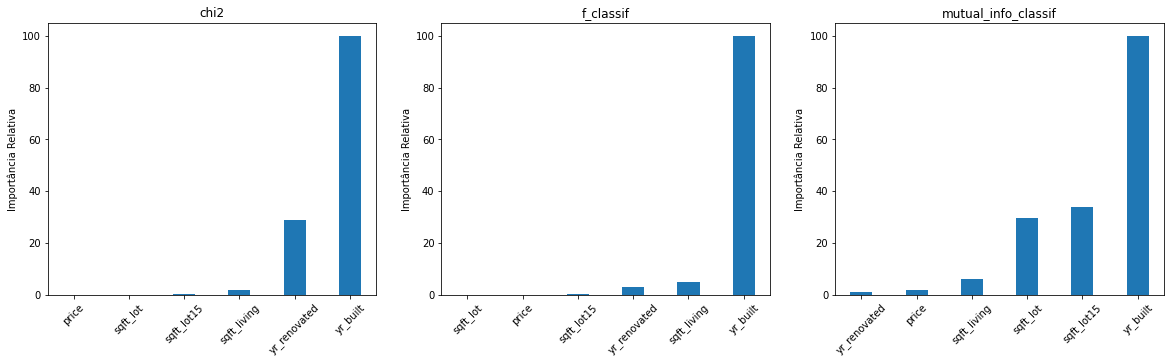

In [ ]:
methods = [chi2, f_classif, mutual_info_classif]
plot_att_importance(methods, df_norm)

### 8. Discretizar os atributos e novamente procurar a importancia de cada atributo usando três métodos

In [ ]:
def data_discretization(df, feature):
  return pd.qcut(df[f'{feature}'], q=4, labels=False)

df_disc = df_norm.copy()
df_disc

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15
0,0.019266,0.478261,0,0.067170,0.003108,0.005742
1,0.060721,0.443478,1,0.172075,0.004072,0.008027
2,0.013770,0.286957,0,0.036226,0.005743,0.008513
3,0.069377,0.565217,0,0.126038,0.002714,0.004996
4,0.057049,0.756522,0,0.104906,0.004579,0.007871
...,...,...,...,...,...,...
21608,0.037377,0.947826,0,0.093585,0.000370,0.000986
21609,0.042623,0.991304,0,0.152453,0.003206,0.007523
21610,0.042898,0.947826,0,0.055094,0.000503,0.001558
21611,0.042623,0.904348,0,0.098868,0.001132,0.000731


In [ ]:
new_df_disc = df_disc.copy(deep=True)
for feature in ['price',	'yr_built',	'sqft_living',	'sqft_lot',	'sqft_lot15']:
  new_df_disc[f"{feature}"] = [x for x in data_discretization(df_disc, feature)]
new_df_disc

,price,yr_built,yr_renovated,sqft_living,sqft_lot,sqft_lot15
0,0,1,0,0,1,1
1,2,0,1,3,1,2
2,0,0,0,0,2,2
3,2,1,0,2,0,0
4,2,2,0,1,2,1
...,...,...,...,...,...,...
21608,1,3,0,1,0,0
21609,1,3,0,2,1,1
21610,1,3,0,0,0,0
21611,1,3,0,1,0,0


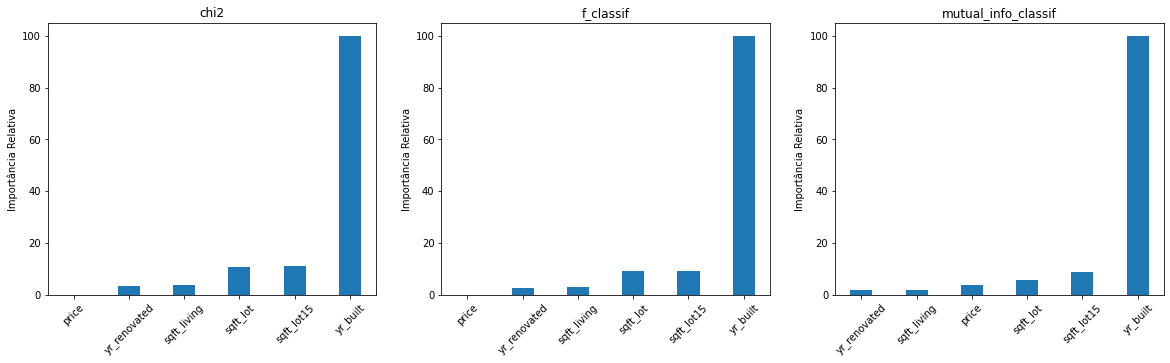

In [ ]:
methods = [chi2, f_classif, mutual_info_classif]
plot_att_importance(methods, new_df_disc)

### 9. Diminuir as dimensões do DataFrame

Criação de dataframe com os atributos mais importantes conforme dataset normalizado e discretizado.

In [ ]:
fields = ['yr_built','sqft_lot','sqft_lot15','sqft_living']
df_final_houses = new_df_houses[fields]
df_final_houses

,yr_built,sqft_lot,sqft_lot15,sqft_living
0,1955,5650,5650,1180
1,1951,7242,7639,2570
2,1933,10000,8062,770
3,1965,5000,5000,1960
4,1987,8080,7503,1680
...,...,...,...,...
21608,2009,1131,1509,1530
21609,2014,5813,7200,2310
21610,2009,1350,2007,1020
21611,2004,2388,1287,1600


In [ ]:
df_final_norm = df_norm[fields]
df_final_norm

,yr_built,sqft_lot,sqft_lot15,sqft_living
0,0.478261,0.003108,0.005742,0.067170
1,0.443478,0.004072,0.008027,0.172075
2,0.286957,0.005743,0.008513,0.036226
3,0.565217,0.002714,0.004996,0.126038
4,0.756522,0.004579,0.007871,0.104906
...,...,...,...,...
21608,0.947826,0.000370,0.000986,0.093585
21609,0.991304,0.003206,0.007523,0.152453
21610,0.947826,0.000503,0.001558,0.055094
21611,0.904348,0.001132,0.000731,0.098868


In [ ]:
df_final_disc = new_df_disc[fields]
df_final_disc

,yr_built,sqft_lot,sqft_lot15,sqft_living
0,1,1,1,0
1,0,1,2,3
2,0,2,2,0
3,1,0,0,2
4,2,2,1,1
...,...,...,...,...
21608,3,0,0,1
21609,3,1,1,2
21610,3,0,0,0
21611,3,0,0,1


### 10. Armazenar em um novo arquivo .csv

In [ ]:
df_final_norm.to_csv('kc_house_data_normalizado.csv')
df_final_disc.to_csv('kc_house_data_norm_disc.csv')
df_final_houses.to_csv('kc_house_data_final.csv')

### Resultado

Após efetuar atividades de normalização e discretização, os atributos que apresentaram maior importância foram: 
 - **yr_built**	
 - **sqft_lot**
 - **sqft_lot15**	
 - **sqft_living**